## 1. Bug Algorithms (Bug2)
This task demonstrates the Bug2 algorithm, where the robot moves towards the goal but navigates around obstacles when encountered.

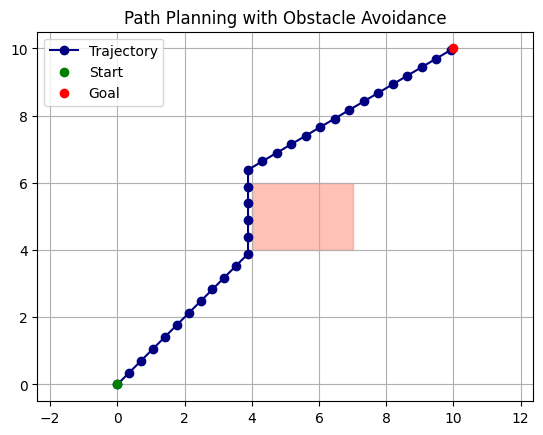

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Initial and target coordinates (as float arrays)
origin = np.array([0, 0], dtype=float)
destination = np.array([10, 10], dtype=float)
trajectory = [origin.copy()]

# Obstacle parameters
rect_origin = np.array([4, 4], dtype=float)
rect_w, rect_h = 3, 2
x_bounds = (rect_origin[0], rect_origin[0] + rect_w)
y_bounds = (rect_origin[1], rect_origin[1] + rect_h)

# Simulation settings
current_pos = origin.copy()
step = 0.5
limit = 200

# Navigation loop
for _ in range(limit):
    vector_to_goal = destination - current_pos
    dist = np.linalg.norm(vector_to_goal)

    if dist <= step:
        break

    in_proximity = (x_bounds[0] - 0.3 < current_pos[0] < x_bounds[1] + 0.3) and \
                   (y_bounds[0] - 0.3 < current_pos[1] < y_bounds[1] + 0.3)

    if in_proximity:
        # Circumnavigate above the obstacle
        if current_pos[1] <= y_bounds[1] + 0.3:
            current_pos += np.array([0, step])
        else:
            current_pos += np.array([step, 0])
    else:
        move_dir = vector_to_goal / dist
        current_pos += move_dir * step

    trajectory.append(current_pos.copy())

trajectory = np.array(trajectory)

# Visualization
fig, ax = plt.subplots()
obstacle_patch = plt.Rectangle(rect_origin, rect_w, rect_h, color='tomato', alpha=0.4)
ax.add_patch(obstacle_patch)

plt.plot(trajectory[:, 0], trajectory[:, 1], linestyle='-', marker='o', color='navy', label='Trajectory')
plt.scatter(*origin, color='green', label='Start', zorder=5)
plt.scatter(*destination, color='red', label='Goal', zorder=5)

plt.title('Path Planning with Obstacle Avoidance')
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()
